# Exploration Project | 01. 가위바위보 분류기


## 데이터 불러오기 + Resize 하기

라이브러리 임포트 (이미지 크기를 조정할 수 있도록 PIL 라이브러리를 가져온다.)
순차적으로 필요한 다른 라이브러리는 해당 코드 블럭에서 임포트 하였음.

In [526]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


------------------------------------
가위, 바위, 보 이미지를 28 * 28 사이즈로 변경해준다.

In [840]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 이미지 파일을 28x28 사이즈로 바꾸기
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	여서
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [841]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 이미지 파일을 28x28 사이즈로 바꾸기
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 이미지 resize 완료!


In [842]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 이미지 파일을 28x28 사이즈로 바꾸기
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들이기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
보 이미지 resize 완료!


-------------------------------------------------
## 데이터 읽어들이기

numpy 라이브러리를 임포트한다. 데이터를 가져오는 함수를 작성한다. 입력 요소의 값을 0~1사이의 값으로 정규화한다.

In [843]:
import numpy as np

def load_data(img_path, number_of_data=600): 
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


## 읽어들인 Training 데이터 확인하기

읽어온 데이터가 내가 준비한 훈련용 데이터가 맞는지 확인한다. matplotlib 라이브러리를 임포트해서 이미지를 확인할 수 있다.

라벨:  0


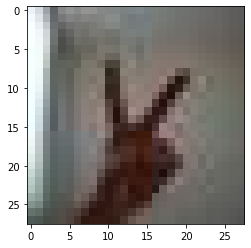

In [844]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

----------------------------------------
## 딥러닝 네트워크 설계하기

케라스의 Sequential 모델을 사용하여 딥러닝 네크워크 모델을 만든다. sequential 모델을 사용하는 이유는 순차적으로 레이어 층을 더해주는 선형 방식이기 때문이다.

In [863]:
import tensorflow as tf
from tensorflow import keras

# RGB 이미지이므로 흑백을 의미하는 1이 아니라 RGB를 나타내는 3으로 변경해야 한다.
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
# 가위, 바위, 보 3개의 클래스이므로 MNIST 데이터셋의 0~9까지 10개 클래스였던 것을 3개로 변경해야 한다.
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  9
Model: "sequential_175"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_397 (Conv2D)          (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_397 (MaxPoolin (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_398 (Conv2D)          (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_398 (MaxPoolin (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_399 (Conv2D)          (None, 3, 3, 256)         590080    
_________________________________________________________________
max_pooling2d_399 (MaxPoolin (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_175 (Flatten)       

## 딥러닝 네트워크 학습시키기

모델을 학습시키기 전에 compile메소드를 통해 학습방식을 설정해준다. optimizer는 정규화기, loss는 손실함수, metrics는 분류의 기준을 설정한다. fit함수를 사용하여 모델을 학습시킨다.

In [864]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10) #epochs 10까지 변경하면서 실행해 보고 결정 (반복학습횟수임)

Epoch 1/10
19/19 [==============================] - 10s 537ms/step - loss: 20.6480 - accuracy: 0.3544
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 1.2279 - accuracy: 0.3671
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 1.0116 - accuracy: 0.4974
Epoch 4/10
19/19 [==============================] - 0s 10ms/step - loss: 0.9150 - accuracy: 0.5947
Epoch 5/10
19/19 [==============================] - 0s 9ms/step - loss: 0.6865 - accuracy: 0.7593
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 0.5682 - accuracy: 0.7481
Epoch 7/10
19/19 [==============================] - 0s 9ms/step - loss: 0.4666 - accuracy: 0.8206
Epoch 8/10
19/19 [==============================] - 0s 9ms/step - loss: 0.6531 - accuracy: 0.7382
Epoch 9/10
19/19 [==============================] - 0s 9ms/step - loss: 0.3977 - accuracy: 0.8450
Epoch 10/10
19/19 [==============================] - 0s 9ms/step - loss: 0.4116 - accuracy: 0.8253


## 테스트

테스트 데이터도 훈련 데이터와 마찬가지로 resizing을 해준다. 데이터를 가져오는 함수를 작성한다. 입력 요소의 값을 0~1사이의 값으로 정규화한다.

In [848]:
def resize_test_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일을 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들임
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들임
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들임
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

def load_test_data(img_path, number_of_data=300):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("x_test_norm shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
x_test_norm shape: (300, 28, 28, 3)
y_test shape: (300,)


## 읽어들인 Test 데이터 확인하기

읽어온 데이터가 내가 준비한 테스트용 데이터가 맞는지 확인한다. matplotlib 라이브러리를 임포트해서 이미지를 확인할 수 있다.

라벨:  0


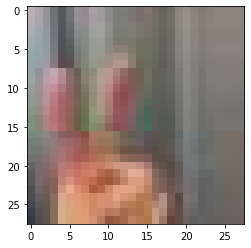

In [849]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

##  test_accuracy 측정

테스트 세트에서 모델의 성능을 측정해 본다. 훈련 세트에서 보다 테스트 세트에서 accuracy가 낮은 이유는 overfitting 때문이다.

In [865]:
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.0929 - accuracy: 0.6133
test_loss: 1.092896580696106 
test_accuracy: 0.6133333444595337


----------------------------------------------------

# [회고]

## 오버피팅을 극복하기 위한 적절한 시도

#### 1. 정규화 시도
- kernel_regularizer=keras.regularizers.l2(0.001)
- L2 정규화 시도 시 accuracy=44% --> 46%

#### 2. 피쳐의 수 줄이기
- n_channel_1, n_channel_2, n_dense를 조정하여 피쳐의 수를 감소시켜 보았음
- 1) 32, 64, 32 설정 시 parameter 70,723, accuracy=34%
- 2) 16, 32, 32 설정 시 parameter 30,819, accuracy=54%

#### 3. epochs 조정해 보기
- epochs=5,  accuracy=39%
- epochs=10, accuracy=37%
- epochs=15, accuracy=38%
- epochs=18, accuracy=45%
- epochs=19, accuracy=51%
- epochs=20, accuracy=48%
- epochs=30, accuracy=43%
- epochs=40, accuracy=47%
- epochs=50, accuracy=34%

##### 정규화, 피쳐 수 조정, 반복학습 횟수조정을 통틀어 가장 높은 test_accuracy값은 54%임.
##### 따라서, 데이터셋을 조정해야 함.

## 데이터셋 조정
- 손의 날선모양 같은, 구분이 모호한 이미지 8개를 삭제하고 가위 앞면 4개와 뒷면 4개로 대체하여 테스트함, accuracy=44%

- 훈련데이터 100개씩 추가하여 총 600개로 테스트함, accuracy=47% epochs=9
- 위 세팅에 정규화 적용시 accuracy=50%까지 올라감

- 특정 각도의 손모양 여러사람 데이터를 대량 추가하여 1866개의 데이터로 테스트함, accuracy=52%, epochs=15
- 위 세팅에 정규화 시도 시 accuracy=56%까지 올라감

- 공통적으로 n_channel_1, n_channel_2, n_dense는 16, 32, 32일 때 가장 accuracy가 높게 나옴.
- feature 값(n_channel_1, n_channel_2, n_dense)이 커질수록 정규화 시 accuracy가 내려감.

- 데이터의 양을 증가시킬 시 accuracy 5~6% 증가. But, accuracy가 60%를 넘지 못함.
- 정규화 시 3~4% 정도 accuracy가 증가함. But, accuracy가 60%를 넘지 못함.

- 결국, 데이터의 양보다 데이터의 구성이 중요하다는 가설을 도출할 수 있음.

#### 최종 결과 도출 세팅 값
- 데이터의 개수는 훈련 600개, 테스트 300개로 하였음.
- 훈련데이터의 대표이미지(ex.손바닥, 손등) 비중을 증가시키는 방법으로 데이터구성을 달리하여 최종 테스트.
- feature값 n_channel_1, n_channel_2, n_channel_3, n_dense는 128, 256, 256, 256으로 설정 (레이어 하나 더 추가함)
- epochs=10
- test_accuracy=61%
- 최종 결과 test_accuracy 60% 이상 도달!

